# <u> Mean-Variance Optimisation

## Importing packages and reading historical prices CSV

In [1]:
#Importing packages

import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file

crypto_hist = pd.read_csv('crypto_historicals.csv', index_col=[0])
crypto_hist.index = pd.to_datetime(crypto_hist.index)
crypto_hist

,BTC,ETH,LTC,BNB,XRP,ADA,AAVE,SOL,DOGE,TRX,NEO,MATIC,DOT,SHIB,NEAR,UNI
date,,,,,,,,,,,,,,,,
2018-01-01,13380.00,754.99,222.61,8.4500,0.0000,0.0000,0.0,0.00,0.00000,0.00000,78.299,0.000,0.00,0.000000,0.000,0.00
2018-02-01,14675.11,855.28,247.33,8.7150,0.0000,0.0000,0.0,0.00,0.00000,0.00000,89.696,0.000,0.00,0.000000,0.000,0.00
2018-03-01,14919.51,934.03,238.77,9.3040,0.0000,0.0000,0.0,0.00,0.00000,0.00000,103.505,0.000,0.00,0.000000,0.000,0.00
2018-04-01,15059.54,940.00,233.00,9.1430,0.0000,0.0000,0.0,0.00,0.00000,0.00000,97.669,0.000,0.00,0.000000,0.000,0.00
2018-05-01,16960.39,959.30,240.54,14.8908,0.0000,0.0000,0.0,0.00,0.00000,0.00000,95.134,0.000,0.00,0.000000,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,28629.80,1727.27,61.60,301.6000,0.3819,0.4566,92.4,41.17,0.08160,0.08083,10.290,0.574,9.12,0.000010,4.806,4.69
2022-05-28,29031.33,1792.22,63.00,307.5000,0.3863,0.4646,95.5,44.25,0.08180,0.08118,10.470,0.588,9.65,0.000011,4.998,4.98
2022-05-29,29468.10,1813.64,63.60,305.8000,0.3891,0.4820,95.5,44.98,0.08270,0.08055,10.640,0.600,9.98,0.000011,5.182,4.95


In [3]:
# Nicole's Strat

sentiment_strategy = pd.read_csv("OLS_Strategy_Returns.csv", index_col="Date")
sentiment_strategy.index = pd.to_datetime(sentiment_strategy.index, format='%d/%m/%y')
sentiment_strategy.columns = ["ETH_sent","LINK_sent","DOGE_sent","ADA_sent"]

sentiment_strategy = sentiment_strategy["2020-08-01":]
sentiment_strategy

,ETH_sent,LINK_sent,DOGE_sent,ADA_sent
Date,,,,
2020-08-01,-0.111033,-0.060965,-0.141594,-0.037618
2020-08-02,-0.000000,-0.000000,-0.000000,-0.000000
2020-08-03,0.035660,0.043631,0.015076,0.026196
2020-08-04,0.000000,-0.000000,0.000000,0.000000
2020-08-05,0.000000,0.000000,-0.000000,-0.000000
...,...,...,...,...
2022-05-27,-0.036919,-0.025975,0.046403,-0.047684
2022-05-28,0.000000,0.000000,0.000000,0.000000
2022-05-29,0.011881,0.035728,0.010942,0.036767


In [4]:
# Brandon Strat

carry_strategy = pd.read_excel("futures-annualized-rolling-basis-trade-3m-24h.xlsx", 
                               sheet_name="Sheet1")
carry_strategy.columns = ["Date","BTC_carry","ETH_carry"]
carry_strategy.Date = carry_strategy['Date'].apply(lambda x: x[:-10])
carry_strategy = carry_strategy.set_index("Date")
carry_strategy.index = pd.to_datetime(carry_strategy.index, format='%Y-%m-%d')

carry_strategy = carry_strategy["2020-08-01":"2022-05-31"]
carry_strategy['BTC_carry'] = np.log(1 + carry_strategy["BTC_carry"]) #converting simple to log returns

carry_strategy

,BTC_carry,ETH_carry
Date,,
2020-08-01,0.000443,0.000415
2020-08-02,0.000373,0.000375
2020-08-03,0.000342,0.000339
2020-08-04,0.000351,0.000357
2020-08-05,0.000377,0.000394
...,...,...
2022-05-27,0.000069,0.000076
2022-05-28,0.000077,0.000083
2022-05-29,0.000081,0.000082


In [5]:
strategy_returns = sentiment_strategy.join(carry_strategy)
strategy_returns

,ETH_sent,LINK_sent,DOGE_sent,ADA_sent,BTC_carry,ETH_carry
Date,,,,,,
2020-08-01,-0.111033,-0.060965,-0.141594,-0.037618,0.000443,0.000415
2020-08-02,-0.000000,-0.000000,-0.000000,-0.000000,0.000373,0.000375
2020-08-03,0.035660,0.043631,0.015076,0.026196,0.000342,0.000339
2020-08-04,0.000000,-0.000000,0.000000,0.000000,0.000351,0.000357
2020-08-05,0.000000,0.000000,-0.000000,-0.000000,0.000377,0.000394
...,...,...,...,...,...,...
2022-05-27,-0.036919,-0.025975,0.046403,-0.047684,0.000069,0.000076
2022-05-28,0.000000,0.000000,0.000000,0.000000,0.000077,0.000083
2022-05-29,0.011881,0.035728,0.010942,0.036767,0.000081,0.000082



## Calculating the covariance matrix


It is called shrinkage because it can be thought of as “shrinking” the sample covariance matrix towards the other estimator, which is accordingly called the shrinkage target. The shrinkage target may be significantly biased but has little estimation error as compared to sample covariance.

Hence, the sample covariance matrix should not be your default choice. I think a better option is Ledoit-Wolf shrinkage, which reduces the extreme values in the covariance matrix.

The constant variance (default) is the shrinkage target , i.e the target is the diagonal matrix with the mean of asset variances on the diagonals and zeroes elsewhere.

In [6]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.CovarianceShrinkage(strategy_returns, 
                                             returns_data=True, 
                                             frequency=365, 
                                             log_returns=True).ledoit_wolf()
sample_cov

,ETH_sent,LINK_sent,DOGE_sent,ADA_sent,BTC_carry,ETH_carry
ETH_sent,0.638835,0.563845,0.436493,0.526637,-0.000027,-0.000031
LINK_sent,0.563845,0.954248,0.659230,0.601089,0.000114,0.000135
DOGE_sent,0.436493,0.659230,1.904150,0.505839,0.000406,0.000507
ADA_sent,0.526637,0.601089,0.505839,0.999134,0.000147,0.000186
BTC_carry,-0.000027,0.000114,0.000406,0.000147,0.038733,0.000016
ETH_carry,-0.000031,0.000135,0.000507,0.000186,0.000016,0.038736


<AxesSubplot:>

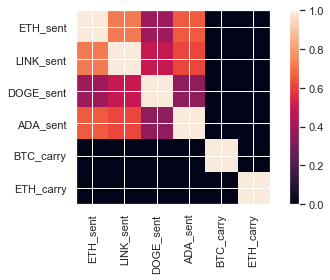

In [7]:
# Plotting the covariance matrix

plotting.plot_covariance(sample_cov, plot_correlation=True)


## Return estimation

In [8]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(crypto_hist)
rets.tail()

,BTC,ETH,LTC,BNB,XRP,ADA,AAVE,SOL,DOGE,TRX,NEO,MATIC,DOT,SHIB,NEAR,UNI
date,,,,,,,,,,,,,,,,
2022-05-27,-0.019573,-0.036245,-0.029921,-0.004620,-0.025765,-0.046565,-0.085149,-0.052256,0.047497,-0.017025,-0.039216,-0.040134,-0.002188,-0.010387,-0.081246,-0.052525
2022-05-28,0.014025,0.037603,0.022727,0.019562,0.011521,0.017521,0.033550,0.074812,0.002451,0.004330,0.017493,0.024390,0.058114,0.027672,0.039950,0.061834
2022-05-29,0.015045,0.011952,0.009524,-0.005528,0.007248,0.037452,0.000000,0.016497,0.011002,-0.007761,0.016237,0.020408,0.034197,0.066852,0.036815,-0.006024
2022-05-30,0.076901,0.102082,0.086478,0.052322,0.076073,0.182158,0.229319,0.049800,0.064087,0.033520,0.107143,0.096667,0.049098,0.059182,0.111540,0.143434
2022-05-31,0.002106,-0.028457,-0.010130,-0.002797,0.007165,0.100035,-0.038330,-0.030707,-0.023750,0.013934,-0.017827,0.007599,-0.011461,-0.036154,0.034201,0.007067


### Exponential moving average used to generate mean returns

The exponential moving average is a simple improvement over the mean historical return; it gives more credence to recent returns and thus aims to increase the relevance of the estimates. This is parameterised by the span parameter, which gives users the ability to decide exactly how much more weight is given to recent data. We use the default settings for span (i.e. 500-day EMA )

In [9]:
"""
mean_return = expected_returns.ema_historical_return(crypto_hist, frequency=365)
mean_return
"""

'\nmean_return = expected_returns.ema_historical_return(crypto_hist, frequency=365)\nmean_return\n'

In [10]:
mean_return = expected_returns.ema_historical_return(strategy_returns, 
                                                      returns_data=True, 
                                                      frequency=365, 
                                                      log_returns= True)
mean_return

ETH_sent     0.988964
LINK_sent    1.501377
DOGE_sent    2.883713
ADA_sent     0.619412
BTC_carry    0.086256
ETH_carry    0.088842
Name: 2022-05-31 00:00:00, dtype: float64

## Weights generated using mean-variance optimisation

In [11]:
from pypfopt import EfficientFrontier

ef = EfficientFrontier(mean_return, sample_cov)  # weight_bounds automatically set to (0, 1)

ef.max_sharpe()
mvo_weights = pd.Series(ef.clean_weights(), name='MVO_weights')

mvo_weights

ETH_sent     0.02077
LINK_sent    0.11222
DOGE_sent    0.23258
ADA_sent     0.00000
BTC_carry    0.31142
ETH_carry    0.32301
Name: MVO_weights, dtype: float64

<AxesSubplot:ylabel='MVO_weights'>

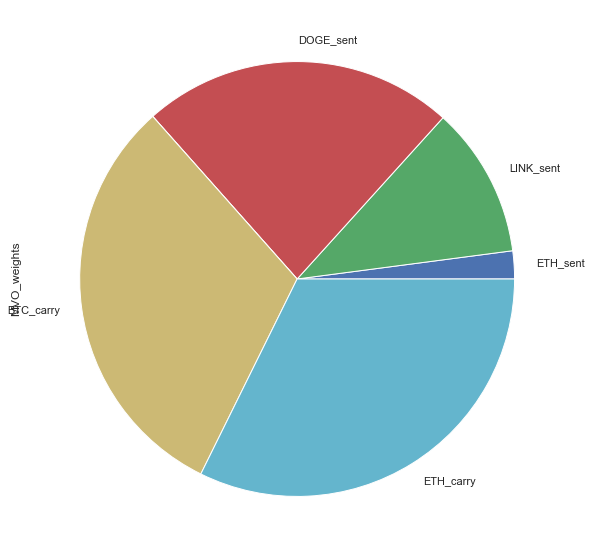

In [12]:
pd.Series(mvo_weights).plot.pie(figsize=(10, 10))

In [13]:
ef.portfolio_performance(verbose=True)

Expected annual return: 91.5%
Annual volatility: 40.6%
Sharpe Ratio: 2.21


(0.9152727003889674, 0.40559038872443764, 2.2073321392169993)

# <u> Hierachical-Risk Parity

Hierarchical Risk Parity is a novel portfolio optimization method developed by Marcos Lopez de Prado. Though a detailed explanation can be found in the linked paper, here is a rough overview of how HRP works:

1. From a universe of assets, form a distance matrix based on the correlation of the assets.<br>
2. Using this distance matrix, cluster the assets into a tree via hierarchical clustering<br>
3. Within each branch of the tree, form the minimum variance portfolio (normally between just two assets).<br>
4. Iterate over each level, optimally combining the mini-portfolios at each node.

The advantages of this are that it does not require the inversion of the covariance matrix as with traditional mean-variance optimization, and seems to produce diverse portfolios that perform well out of sample.

## Weights generated using hierachical risk parity

In [14]:
from pypfopt import HRPOpt

hrp = HRPOpt(returns=strategy_returns, cov_matrix=sample_cov)
hrp.optimize()
hrp_weights = pd.Series(hrp.clean_weights(), name='HRP_weights')
hrp_weights

ETH_sent     0.00000
LINK_sent    0.00000
DOGE_sent    0.00000
ADA_sent     0.00000
BTC_carry    0.54843
ETH_carry    0.45153
Name: HRP_weights, dtype: float64

<AxesSubplot:ylabel='HRP_weights'>

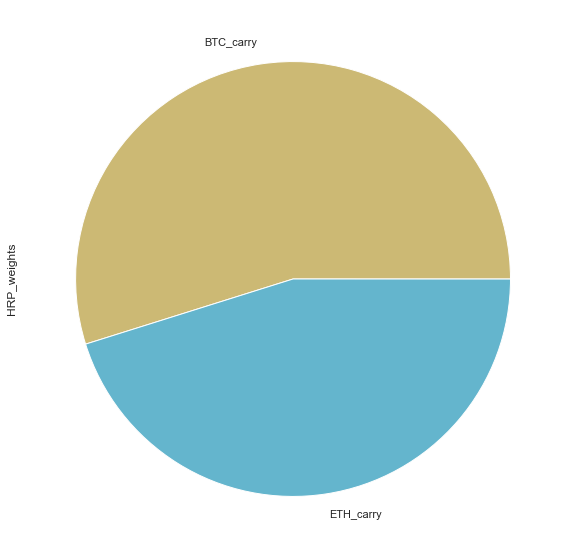

In [15]:
pd.Series(hrp_weights).plot.pie(figsize=(10, 10))

In [16]:
hrp.portfolio_performance(verbose=True)

Expected annual return: 7.7%
Annual volatility: 0.3%
Sharpe Ratio: 16.51


(0.07720320489185965, 0.003465755087657838, 16.505264637876547)

<AxesSubplot:>

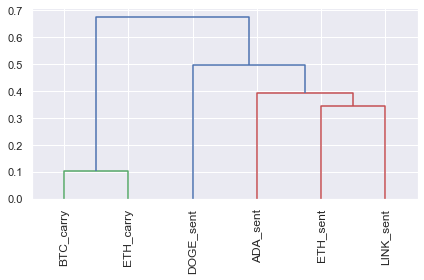

In [17]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp)

# <u> The Critical Line Algorithm

This is a robust alternative to the quadratic solver used to find mean-variance optimal portfolios, that is especially advantageous when we apply linear inequalities. Unlike generic convex optimization routines, the CLA is specially designed for portfolio optimization.

## Weights generated using critical line algorithm

In [18]:
from pypfopt import CLA

In [19]:
cla = CLA(expected_returns=mean_return, cov_matrix=sample_cov)
cla.max_sharpe()

cla_weights = pd.Series(cla.clean_weights(), name='CLA_weights')

cla_weights

ETH_sent     0.02146
LINK_sent    0.09430
DOGE_sent    0.19500
ADA_sent     0.00000
BTC_carry    0.33978
ETH_carry    0.34946
Name: CLA_weights, dtype: float64

<AxesSubplot:ylabel='CLA_weights'>

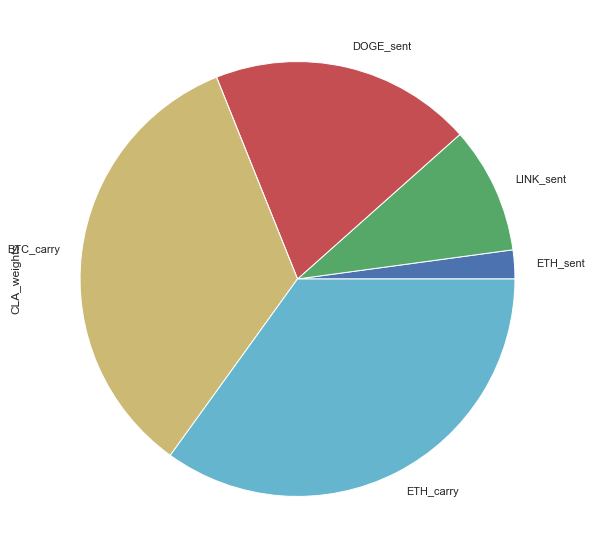

In [20]:
pd.Series(cla_weights).plot.pie(figsize=(10, 10))

In [21]:
cla.portfolio_performance(verbose=True)

Expected annual return: 78.5%
Annual volatility: 34.7%
Sharpe Ratio: 2.20


(0.7854915787458328, 0.34743671092205997, 2.2032547358461336)

# <u> Combining the weights together

In [22]:
weights = pd.concat([mvo_weights,hrp_weights,cla_weights], axis=1)

In [23]:
weights

,MVO_weights,HRP_weights,CLA_weights
ETH_sent,0.02077,0.00000,0.02146
LINK_sent,0.11222,0.00000,0.09430
DOGE_sent,0.23258,0.00000,0.19500
ADA_sent,0.00000,0.00000,0.00000
BTC_carry,0.31142,0.54843,0.33978
ETH_carry,0.32301,0.45153,0.34946


In [24]:
weights.to_csv("optimised_weights.csv")

In [25]:
strategy_returns.to_csv("combined_strat_returns.csv")

## Sources:

https://pyportfolioopt.readthedocs.io/en/stable/index.html
https://github.com/robertmartin8/PyPortfolioOpt/tree/1db089602dee348f1eade9b981ca21cd35f1dcca/cookbook

https://pyportfolioopt.readthedocs.io/en/latest/